In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('datasets/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


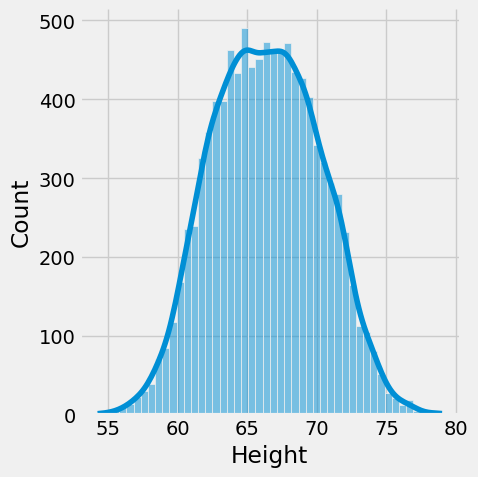

In [3]:
sns.displot(data = df, x = df['Height'], kde=True)

<Axes: xlabel='Height'>

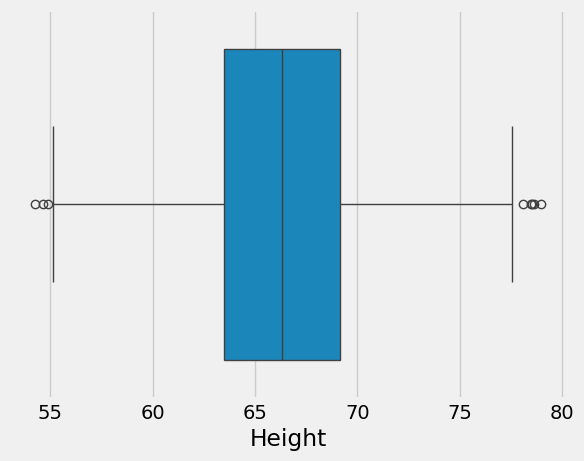

In [4]:
sns.boxplot(data=df, x=df['Height'])

In [5]:
upper_lim = df['Height'].quantile(0.99)
lower_lim = df['Height'].quantile(0.01)

# Trimming

In [6]:
new_df1 = df[(df['Height'] <= upper_lim) & (df['Height'] >= lower_lim)]
new_df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


<Axes: xlabel='Height'>

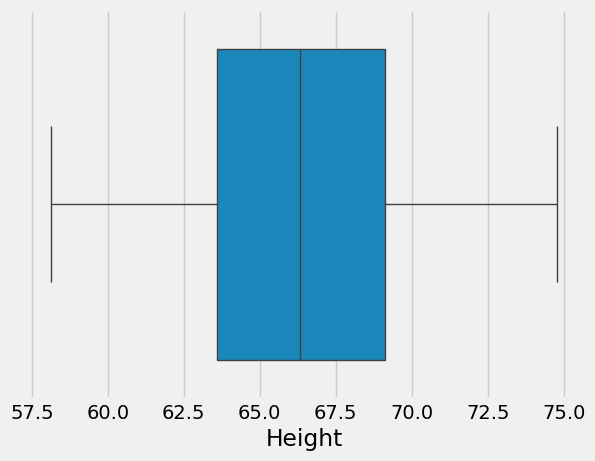

In [7]:
# sns.displot(data = new_df1, x = new_df1['Height'], kde=True)
sns.boxplot(data=new_df1, x = new_df1['Height'])

# capping

In [8]:
new_df2 = df.copy()
new_df2['Height'] = np.where(
    new_df2['Height'] >= upper_lim,
    upper_lim,
    np.where(
        new_df2['Height'] <= lower_lim,
        lower_lim,
        new_df2['Height']
    )
)
new_df2

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


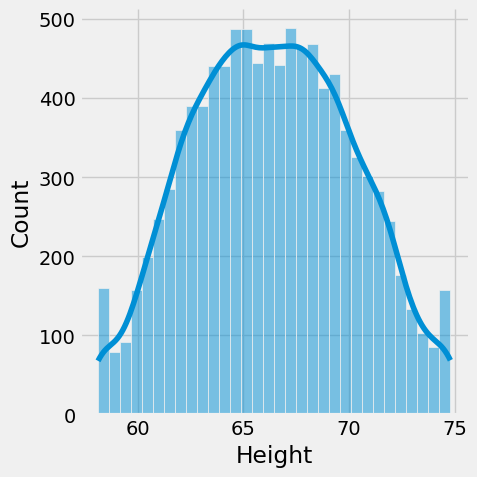

In [9]:
sns.displot(data = new_df2, x = new_df2['Height'], kde=True)
# sns.boxplot(data=new_df2, x = new_df2['Height'])